In [1]:
# Data handling imports

import yfinance as yf
import pandas as pd
import numpy as np
# import datetime as dt
from datetime import date
# import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
from statistics import mode
import datetime as dt

In [2]:
tix = pd.read_table('./DJIA_comps.txt', header=None).to_numpy()

In [3]:
tix = np.concatenate(tix, axis=0).tolist()

In [4]:
import pickle

with open('tix_df.pkl', 'rb') as f:
    tix_df = pickle.load(f)    

In [5]:
today_input = pd.DataFrame(index=tix, columns=tix_df[0].columns)

In [6]:
tix_df[0].iloc[6,:]

date                                           2020-06-08
trending                                            False
trendingScore                                    0.448485
sentimentChange                                         0
volumeChange                                         2.52
price                                              166.01
change                                               -1.4
percent                                            -0.838
lastUpdated                   06/08/2020, 07:59:23 PM EDT
extendedHoursChange                                 -0.86
open                                                167.1
outcome                                           Success
last                                               166.01
extendedHoursPrice                                 166.01
easternDateTime               06/08/2020, 04:00:00 PM EDT
previousCloseDate                              2020-06-05
previousClose                                      167.41
dateTime      

In [8]:
todays_row = 6

for i in range(len(today_input)):
    today_input.iloc[i,:] = tix_df[i].iloc[todays_row,:] 

In [9]:
# [2,4] = [sentimentChange, percent]

model_input = today_input.loc[:,["sentimentChange","percent"]]

In [10]:
model_input

,sentimentChange,percent
MMM,0,-0.838
AXP,-2.19,3.353
AAPL,2.93,0.336
BA,0.17,16.074
CAT,2.67,1.924
CVX,2.45,2.885
CSCO,-1.56,0.461
KO,0.93,1.729
DIS,-0.18,1.916
DOW,5.88,4.28


In [11]:
from sklearn.externals import joblib
model = joblib.load('twitsML_model.pkl')

In [12]:
tomorrow_pred = model.predict(model_input)

In [13]:
tomorrow_pred

array([-1., -1., -1.,  1., -1., -1., -1., -1., -1.,  1., -1.,  1., -1.,
       -1., -1., -1., -1., -1., -1., -1.,  1., -1.,  1., -1., -1., -1.,
       -1., -1., -1.,  1.])

In [14]:
final_results = pd.DataFrame(tomorrow_pred, index=model_input.index)
final_results.columns = ["Decision"]

In [15]:
longs = final_results[final_results["Decision"] > 0]

In [51]:
longs.index[0]

'BA'

In [41]:
test = pd.DataFrame([[7.12, 280]])
test.columns = ["sentimentChange", "pctChg"]
test.index = ["Test"]

model.predict(test)

array([1.])

SFIX = up
UDOW = down
MARK = up
NKLA = up
AZUL = up

In [57]:
for i in range(len(longs.index)):
    print(model_input.loc[longs.index[i]])
    print("")

sentimentChange      0.17
percent            16.074
Name: BA, dtype: object

sentimentChange    5.88
percent            4.28
Name: DOW, dtype: object

sentimentChange    6.4
percent            1.1
Name: GS, dtype: object

sentimentChange    5.74
percent            1.27
Name: NKE, dtype: object

sentimentChange   -5.71
percent            0.44
Name: PG, dtype: object

sentimentChange     7.32
percent            3.469
Name: WBA, dtype: object



In [64]:
x = tix_df[0].loc[:,"sentimentChange"]

In [66]:
y = tix_df[0].loc[:,"percent"]

In [73]:
x = x[:6]

In [71]:
y = y[1:7]

In [74]:
x

0   -0.38
1   -1.11
2   -1.22
3   -3.33
4       0
5    9.29
Name: sentimentChange, dtype: object

In [75]:
y

1   -1.013
2    1.857
3    2.271
4    0.831
5    3.026
6   -0.838
Name: percent, dtype: object

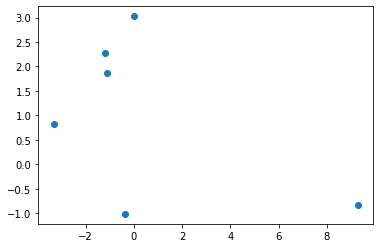

In [77]:
plt.scatter(x,y)

/Users/Brian/ENTER/lib/python3.6/site-packages/ipykernel/__main__.py:14: RuntimeWarning: divide by zero encountered in log
/Users/Brian/ENTER/lib/python3.6/site-packages/ipykernel/__main__.py:14: RuntimeWarning: invalid value encountered in log
/Users/Brian/ENTER/lib/python3.6/site-packages/ipykernel/__main__.py:15: RuntimeWarning: invalid value encountered in log
/Users/Brian/ENTER/lib/python3.6/site-packages/ipykernel/__main__.py:16: RuntimeWarning: invalid value encountered in log


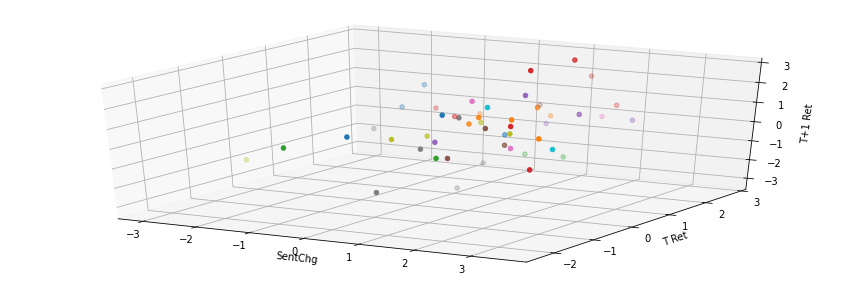

In [124]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,5

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(len(tix_df)):
    x = tix_df[i].loc[:,"sentimentChange"]
    y = tix_df[i].loc[:,'percent']
    z = tix_df[i].loc[:,"percent"]
    
    x = np.log(x[:6].tolist())
    y = np.log(y[:6].tolist())
    z = np.log(z[1:7].tolist())
    
    ax.scatter(x, y, z)

    ax.set_xlabel('SentChg')
    ax.set_ylabel('T Ret')
    ax.set_zlabel('T+1 Ret')


In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = x.tolist()
y = y.tolist()
z = z.tolist()

ax.scatter(x, y, z)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

In [110]:
y.tolist()

[2.864, -0.06300000000000006, 0.853, 0.29900000000000004, 1.285, 2.492]